In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, os, seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palette = ["#8AB223", "#44A813", "#EDB902"]

sns.set_theme(rc={'figure.figsize':(18,3), 'axes.titlesize':10, 'axes.labelsize':8, 'legend.fontsize':8, 'xtick.labelsize':10, 'ytick.labelsize':10, 'font.size':8})
sns.set_style("dark")
sns.set_palette(palette)

### Analytics
- https://stackoverflow.com/questions/68909283/how-to-customize-pandas-pie-plot-with-labels-and-legend
- https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
- https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

In [3]:
database = pd.read_parquet("db_reclamacoes.parquet")
database.head(3)

,id,title_ask,location_ask,date_ask,ask,date_answer,answer,date_final_answer,final_answer,business_again,service_note,resolved,link,company,source,status,uf_ask
0,187100053.0,Aplicativo de celular,-- - --,19/04/2024 às 08:45,Após a última atualização do aplicativo do Ban...,19/04/2024 às 14:17,"Olá, Leo.\n\nEsperamos que esteja bem!\n\nRece...",19/04/2024 às 14:29,Uma versão com problemas e a solução que dão é...,Não,0,Não resolvido,https://www.reclameaqui.com.br/itau/aplicativo...,itau,reclame_aqui,None,None
1,187093101.0,Redução de limites,Brasília - DF,19/04/2024 às 00:30,Venho por meio desta manifestar minha insatisf...,19/04/2024 às 13:51,"Olá, Leandro.\n\nEsperamos que esteja bem!\n\n...",20/04/2024 às 00:15,"Pessimo atendimento, nem ao menos tiveram a co...",Não,0,Não resolvido,https://www.reclameaqui.com.br/itau/reducao-de...,itau,reclame_aqui,None,None
2,187092297.0,Demora pra atendimento Uniclass,São Paulo - SP,18/04/2024 às 23:56,Hoje dia 18/04/24 estive na minha agência no p...,19/04/2024 às 11:34,"Olá, Jorge esperamos que esteja bem.\n\nInicia...",19/04/2024 às 18:18,Esperava que o gerente geral da agência reclam...,Sim,1,Não resolvido,https://www.reclameaqui.com.br/itau/demora-pra...,itau,reclame_aqui,None,None


In [4]:
print(f"COMPANIES: {database["company"].drop_duplicates().count()}")
database.groupby("company").count()

COMPANIES: 39


,id,title_ask,location_ask,date_ask,ask,date_answer,answer,date_final_answer,final_answer,business_again,service_note,resolved,link,source,status,uf_ask
company,,,,,,,,,,,,,,,,
agibank,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,2334,0,0
banco-bmg,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,0,0
banco-crefisa,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516,0,0
banco-do-brasil,3372,3372,3372,3372,3372,3372,3372,3372,3370,3372,3372,3372,3372,3372,0,0
banco-investcred-unibanco,225,225,225,225,225,225,225,225,225,225,225,225,225,225,0,0
banco-neon,3195,3195,3195,3195,3195,3195,3195,3195,3194,3195,3195,3195,3195,3195,0,0
banco-pan,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,0,0
banco-safra,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,0,0
bancoob-banco-cooperativo-do-brasil,1553,1553,1553,1553,1553,1553,1553,1553,1552,1553,1553,1553,1553,1553,0,0


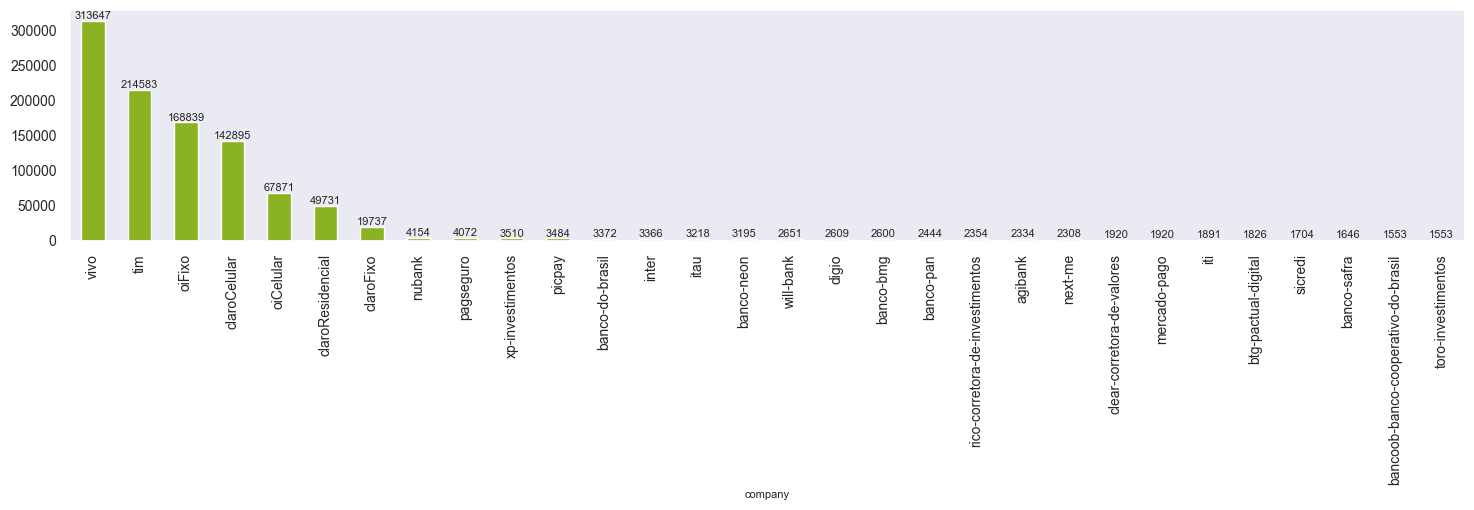

In [5]:
plot = database.groupby("company").count()["ask"].sort_values(ascending=False)[:30].plot(kind="bar", label="Empresas")
plot = plot.bar_label(plot.containers[0])

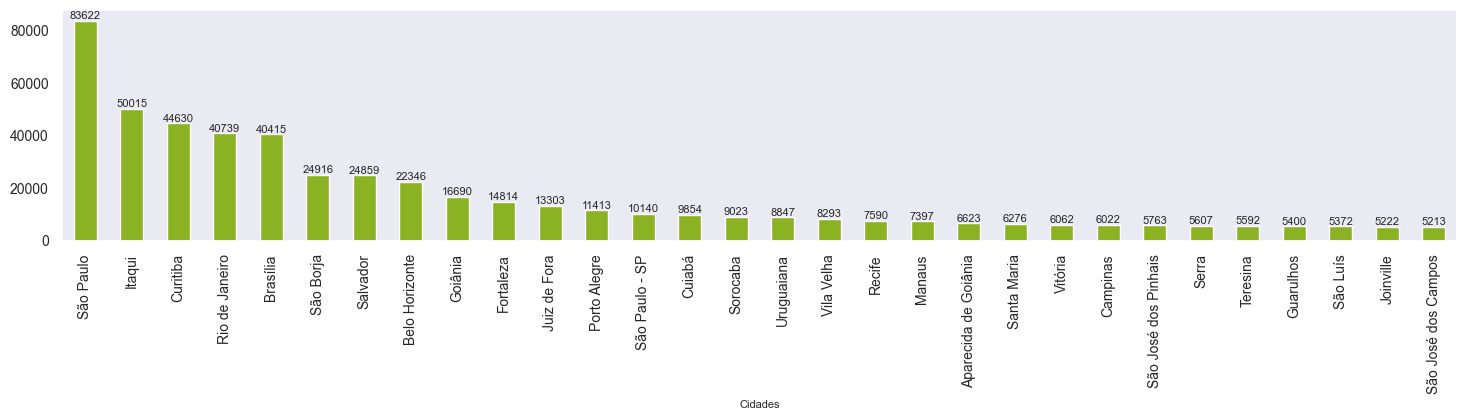

In [6]:
plot = database.groupby("location_ask").count()["ask"].sort_values(ascending=False)[:30].plot(kind="bar", xlabel="Cidades")
plot = plot.bar_label(plot.containers[0])

### Convert note to Class
A classe neutra também será tratada como negativa

<img src="https://www.conversion.com.br/wp-content/uploads/2022/11/NPS-1024x341.png" alt="drawing" width="500"/>

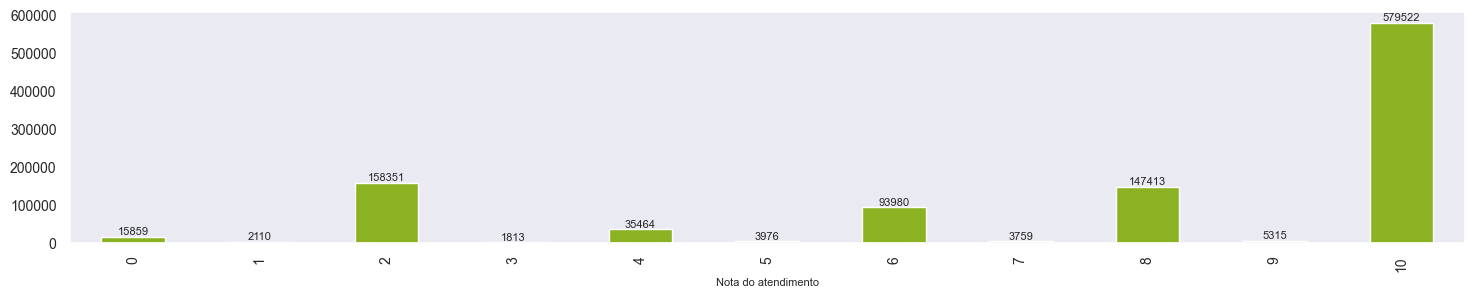

In [7]:
plot = database.groupby("service_note").count()["ask"].plot(kind="bar", xlabel="Nota do atendimento")
plot = plot.bar_label(plot.containers[0])

In [8]:
notes = database['service_note'].values
class_notes = []
class_notes_s = []

for n in notes:
    if n >= 9:
        class_notes.append(1)
        class_notes_s.append("Bom")
    else:
        class_notes.append(0)
        class_notes_s.append("Ruim")

database["service_class"] = class_notes
database["service_class_str"] = class_notes_s

<Axes: title={'center': 'Nota do atendimento'}>

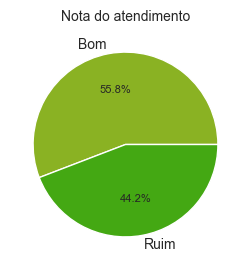

In [9]:
database.groupby("service_class_str").count()["ask"].plot(kind="pie", autopct='%1.1f%%', title="Nota do atendimento", ylabel="")

<Axes: title={'center': 'Situação da reclamação'}>

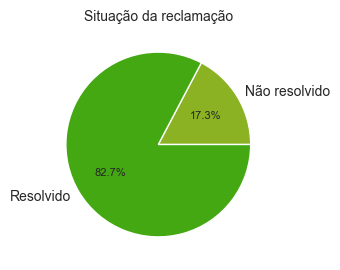

In [10]:
database["resolved_class"] = [1 if d == "Resolvido" else 0 for d in database["resolved"]]
database.groupby("resolved").count()["ask"].plot(kind="pie", autopct='%1.1f%%', title="Situação da reclamação", ylabel="")

<Axes: title={'center': 'Volta a fazer negócio'}>

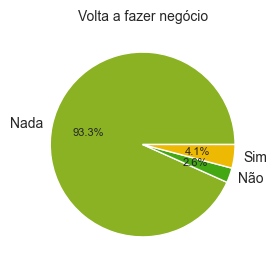

In [11]:
database.groupby("business_again").count()["ask"].plot(kind="pie", autopct='%1.1f%%', title="Volta a fazer negócio", ylabel="")

# Limpeza dos dados

In [12]:
database = database[["company", "source", "ask", "answer", "final_answer", "service_note", "service_class", "resolved_class"]]
database = database.dropna(how="any", axis=0)
database = database.sort_values(by="service_note", ascending=False).reset_index(drop=True)
database.shape

(1047512, 8)

In [13]:
display(database.groupby("ask").count()["answer"].sort_values(ascending=False)[:20])
database.drop_duplicates(subset=["ask"], inplace=True)
database.shape

ask
Infelizmente, desde outubro do ano passado a referida empresa tem prejudicado e muito o exercício de minhas atividades laborais. Sou profissional liberal e vivo e o celular é o objeto meio para que eu possa ganhar a minha vida. Precisei comprar um celular usado que tivesse ainda a tecnologia 2G pois somente esta funciona um pouco melhor que as demais. As redes 3G e 4G estão prejudicando uma série de consumidores. Sou um deles. Tenho de realizar uma média de 3 a 4 chamadas para a mesma pessoa para poder conversar com ela. Minha saída tem sido utilizar a internet WI-FI de outra operadora que me possibilita conversar via Whatsapp. Gostaria que me fosse apresentado uma solução. Grato.                                                                                                                                                                                                                                                                                                                   

(783971, 8)

In [14]:
display(database.groupby("answer").count()["ask"].sort_values(ascending=False)[:20])
database.drop_duplicates(subset=["answer"], inplace=True)
database.shape

answer
Prezado(a) Cliente,  Conforme manifestação registrada junto ao site www.consumidor.gov.br segue posicionamento da VIVO.  Caso haja alguma dúvida, discordância ou questionamento, gentileza utilizar o botão “Interagir com o Fornecedor”.  FAVOR VISUALIZAR O CAMPO “ANEXO”.  Obs.: Em caso de consulta pelo celular, poderá não ser disponibilizado a carta em anexo pois depende da funcionalidade de cada aparelho. Dessa forma orientamos o acesso pelo computador/tablet.  Atenciosamente,  Vivo.                                                                                                                                                                                                                                                                                                                                                                                                          4239
Contatamos o(a) responsável por esta manifestação o(a) qual ficou ciente das informações e providências com

(487675, 8)

In [15]:
display(database.groupby("final_answer").count()["ask"].sort_values(ascending=False)[:20])
database.drop(columns=["final_answer"], inplace=True)

final_answer
<não há comentários do consumidor>    147232
Resolvido                               1565
.                                       1556
ok                                      1076
Bom                                     1065
Ok                                       996
Obrigado                                 962
Resolvido.                               798
Problema resolvido.                      617
Problema resolvido                       553
resolvido                                533
Obrigada                                 454
Ótimo                                    451
Obrigado.                                408
obrigado                                 405
Ótimo atendimento                        388
Obrigado!                                381
Péssimo                                  346
Muito bom                                342
Resolvido!                               314
Name: ask, dtype: int64

In [16]:
database.head(3)

,company,source,ask,answer,service_note,service_class,resolved_class
0,tim,consumidor_gov,"minha linha encontra-se bloqueada, não consigo...","Olá, Johanes ""Esclarecimento sobre cancelamen...",10,1,1
1,oiFixo,consumidor_gov,"Prezados, Em dezembro de 2018, procurei a emp...","Conforme contato realizado no dia 17/05/2019, ...",10,1,1
2,vivo,consumidor_gov,Estão me cobrando mais do que foi proposto na ...,"Prezado (a) Cliente, Realizamos tentativa de c...",10,1,1


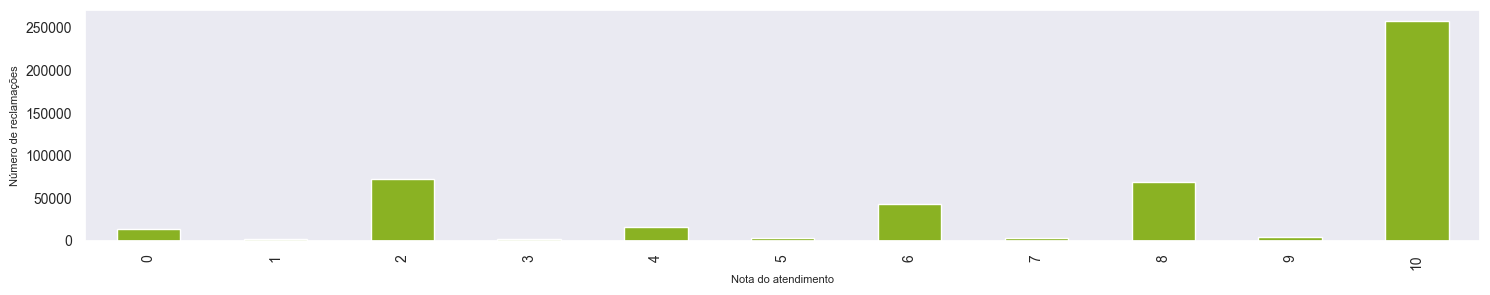

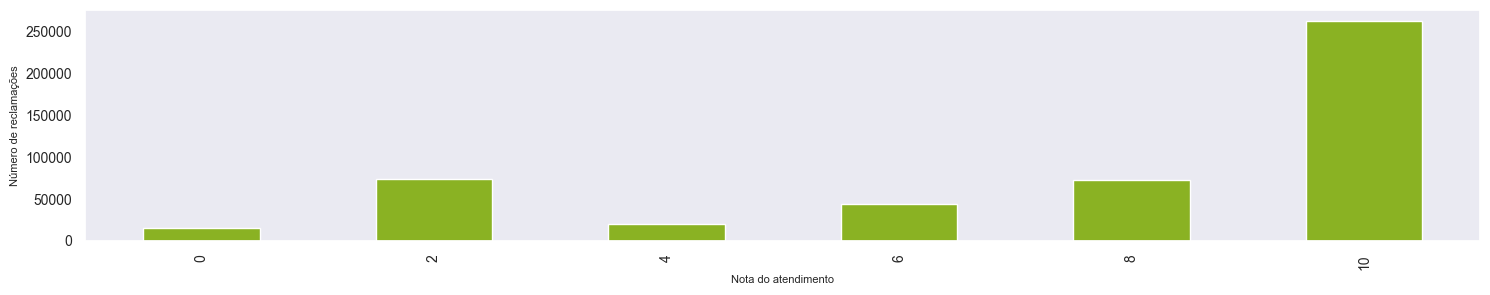

In [17]:
database.groupby("service_note").count()["ask"].plot(kind="bar", xlabel="Nota do atendimento", ylabel="Número de reclamações")
plt.show()

mapping = {1: 0, 3: 2, 5: 4, 7: 8, 9: 10}
mapped_notes = [mapping.get(n, n) for n in database["service_note"]]
database["service_note"] = mapped_notes

database.groupby("service_note").count()["ask"].plot(kind="bar", xlabel="Nota do atendimento", ylabel="Número de reclamações")
plt.show()

<Axes: title={'center': 'Nota do atendimento'}>

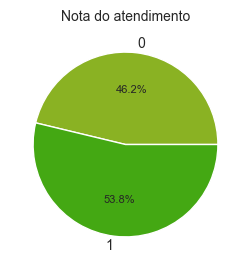

In [18]:
database.groupby("service_class").count()["ask"].plot(kind="pie", autopct='%1.1f%%', title="Nota do atendimento", ylabel="")

<Axes: title={'center': 'Situação da reclamação'}>

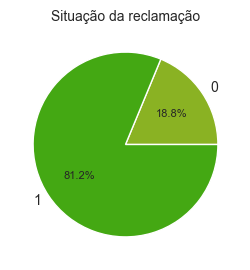

In [19]:
database.groupby("resolved_class").count()["ask"].plot(kind="pie", autopct='%1.1f%%', title="Situação da reclamação", ylabel="")

In [20]:
req_cs = database.groupby(["company", "service_class"]).count()["ask"].unstack(fill_value=0)
req_cs["total"] = req_cs.sum(axis=1)
req_cs["%"] = req_cs[0] / req_cs["total"]
req_cs = req_cs.reset_index().sort_values(by="total", ascending=True)
display(req_cs)

remove_cs = [d["company"] for d in req_cs.to_dict(orient="records") if d["%"] < 0.2 or d["%"] > 0.8 or d["total"] < 1000]
print(f"Removing companies: {remove_cs}")

database = database[~database["company"].isin(remove_cs)]
database.shape

service_class,company,0,1,total,%
4,banco-investcred-unibanco,31,26,57,0.543860
2,banco-crefisa,203,243,446,0.455157
12,caixa-economica-federal,569,62,631,0.901743
9,bradesco,683,341,1024,0.666992
11,c6-bank,815,233,1048,0.777672
31,santander,670,384,1054,0.635674
35,toro-investimentos,511,583,1094,0.467093
33,stone,552,617,1169,0.472198
30,safrapay,716,464,1180,0.606780
8,bancoob-banco-cooperativo-do-brasil,757,433,1190,0.636134


Removing companies: ['banco-investcred-unibanco', 'banco-crefisa', 'caixa-economica-federal']


(486541, 7)

In [ ]:
database.to_parquet("db_reclamacoes_clean.parquet", index=False)